In [15]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

1. Загрузить файл hr.csv.

In [10]:
data = pd.read_csv('hr.csv')
data[:7]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low



2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
moda = data.mode()
moda[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


In [17]:
print(f'Медиана - satisfaction_level: {statistics.median(data.satisfaction_level)}')
print(f'Медиана - last_evaluation: {statistics.median(data.last_evaluation)}')
print(f'Медиана - number_project: {statistics.median(data.number_project)}')
print(f'Медиана - average_montly_hours: {statistics.median(data.average_montly_hours)}')
print(f'Медиана - time_spend_company: {statistics.median(data.time_spend_company)}')
print(f'Медиана - Work_accident: {statistics.median(data.Work_accident)}')
print(f'Медиана - left: {statistics.median(data.left)}')
print(f'Медиана - promotion_last_5years: {statistics.median(data.promotion_last_5years)}')
print(f'Медиана - sales: {statistics.median(data.sales)}')
print(f'Медиана - salary: {statistics.median(data.salary)}')

Медиана - satisfaction_level: 0.64
Медиана - last_evaluation: 0.72
Медиана - number_project: 4
Медиана - average_montly_hours: 200
Медиана - time_spend_company: 3
Медиана - Work_accident: 0
Медиана - left: 0
Медиана - promotion_last_5years: 0
Медиана - sales: sales
Медиана - salary: low


3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [18]:
# замена категорий на числовые значения
print(data.sales.unique())
# sales - 0, accounting - 1, hr - 2, technical - 3,
# support - 4, management - 5, IT - 6, product_mng - 7,
# marketing - 8, RandD - 9
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [68]:
data_total = data.copy()

def if_row(row):
    if row == 'sales':
        return 0
    elif row == 'accounting':
        return 1
    elif row == 'hr':
        return 2
    elif row == 'technical':
        return 3
    elif row == 'support':
        return 4
    elif row == 'management':
        return 5
    elif row == 'IT':
        return 6
    elif row == 'product_mng':
        return 7
    elif row == 'marketing':
        return 8
    return 9
data_total['type_of_job'] = data_total['sales'].apply(if_row)

def if_salary_level(row):
    if row == 'low':
        return 0
    elif row == 'medium':
        return 1
    return 2

data_total['salary_level'] = data_total['salary'].apply(if_salary_level)
data_total.drop(['sales', 'salary'], axis=1, inplace=True)
data_total.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,type_of_job,salary_level
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [75]:
data_total.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,type_of_job,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.339823,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [74]:
corr_total = data_total.corr()
corr_total

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,type_of_job,salary_level
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
type_of_job,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary_level,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


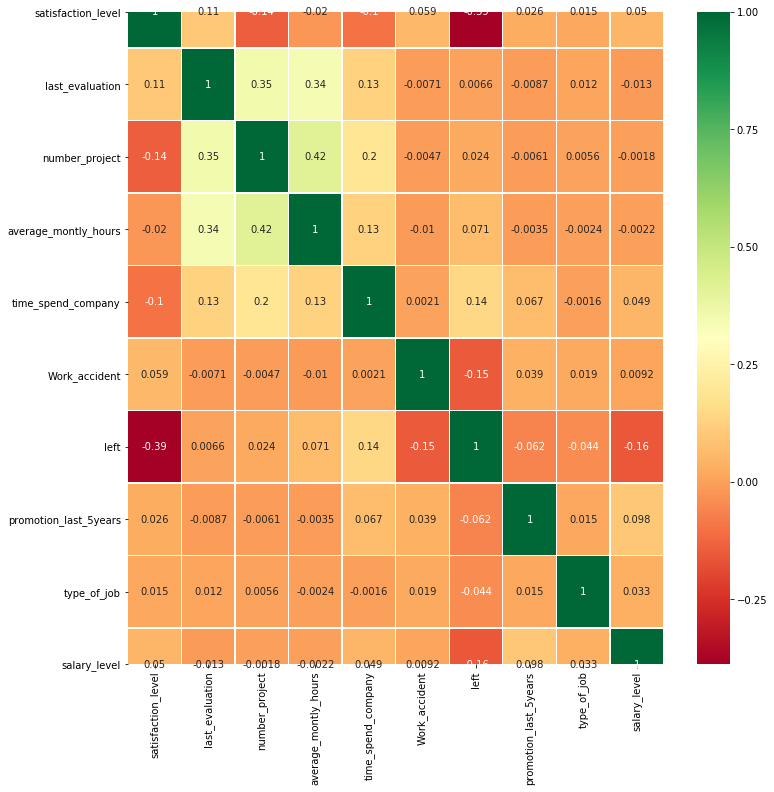

In [76]:
sns.heatmap(corr_total,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [44]:
#Видим, что
# наибольшая корреляция наблюдается между количеством проектов, в которых участвует сотрудник,
# со средним количеством отработанных часов.
# наибольшая обратная корреляция между уровнем удовлетворённости и увольнения -чем больше недоволен сотрудник, тем вероятнее он уволится

4. Визуализировать несколько взаимосвязей между переменными.

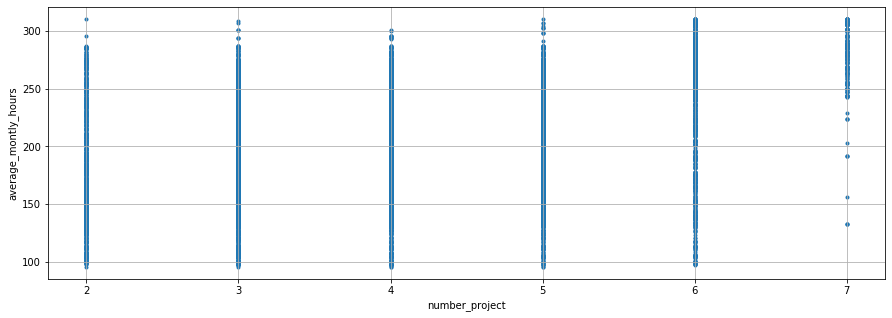

In [54]:
#  взаимосвязь между наиболее коррелирующими атрибутами
plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
plt.grid(True)
plt.scatter(data.number_project, data.average_montly_hours, marker='.')

In [45]:
# На графике видим, что тяжело выдержать работу более 280 часов, однако, чем больше проектов, тем большему числу сотрудников приходится работать
#  дискретное равномерное распределение


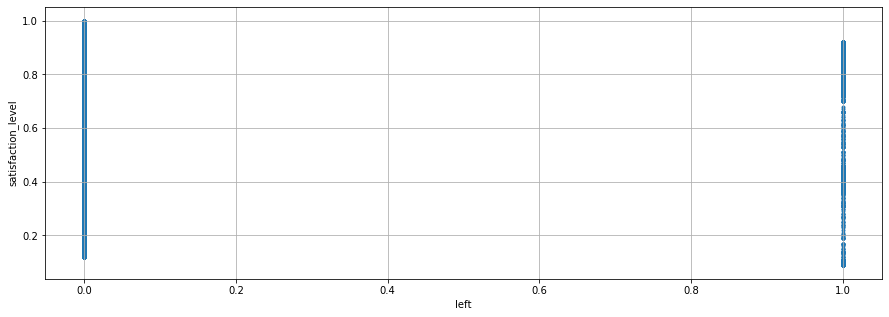

In [55]:
plt.xlabel('left')
plt.ylabel('satisfaction_level')
plt.grid(True)
plt.scatter(data.left, data.satisfaction_level, marker='.')

In [46]:
# распределение Бернулли
# по графику можно предположить, что уволившиеся сотрудники на последнем анкетировании показали не удовлетворенность работой


5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [78]:
# предположим, что инциденты на работе не связаны с увольнением
data_test_1 = data_total[data_total['left'] == 0]['Work_accident']
print(len(data_test_1))
data_test_2 = data_total[data_total['left'] == 1]['Work_accident']
print(len(data_test_2))
stats.ttest_ind(data_test_1.sample(n=3571), data_test_2)

11428
3571


Ttest_indResult(statistic=17.558060614525075, pvalue=1.339067614655269e-67)

In [25]:
# предположение не верно, есть связь между фактом увольнения и инцидентами


In [79]:
# предположим, что среднее количество отработанных часов за месяц не связано с фактом повышения на работе
data_test_3 = data_total[data_total['promotion_last_5years'] == 0]['average_montly_hours']
print(len(data_test_3))
data_test_4 = data_total[data_total['promotion_last_5years'] == 1]['average_montly_hours']
print(len(data_test_4))
stats.ttest_ind(data_test_1.sample(n=319), data_test_4)

14680
319


Ttest_indResult(statistic=-73.97653138610207, pvalue=1.245627098e-314)

In [27]:
# отвергаем предположение - вероятно, проводящие больше времени на работе чаще получают повышение

6. Рассчитать сколько работников работает в каждом департаменте.

In [58]:
employees = data[data['left'] == 0]
employees['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64


7.Показать распределение сотрудников по зарплатам.

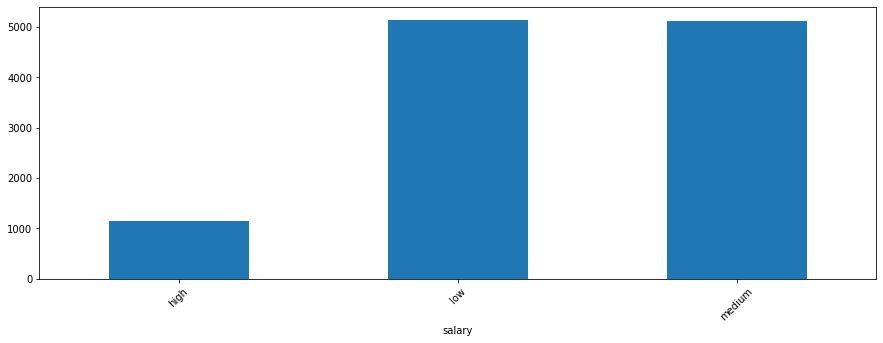

In [59]:
data_salary = employees.groupby(['salary'])['salary'].count()
data_salary.plot(kind='bar', rot=45)

In [47]:
# наибольшую зарплату получает ~10% от всей численности работников, есть предположение, что это руководители\топ-менедежры


8.Показать распределение сотрудников по зарплатам совместно с департаментами.

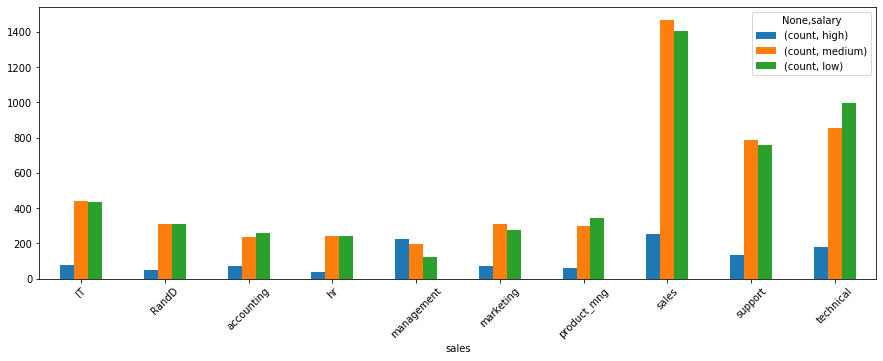

In [80]:
deps_sal = employees.groupby(['sales', 'salary']).count()[['left']]
deps_sal = deps_sal.rename(columns={"left": "count"}).reindex(level=1, index = ['high', 'medium', 'low'])
plt.rcParams["figure.figsize"] = (15,5)
deps_sal.unstack('salary').plot(kind='bar', rot=45)

In [ ]:
# Видим, что
# больше всего сотрудников отдела Продаж, Технического отдела и службы Поддержки (Customer Service), которые "подхватывают наработки отдела Продаж"
#  вообще очень стандартно для среднестатестической компании или торговой или производства

9.Сколько сотрудников покинули компанию.

In [61]:
len(data[data['left']==1])

3571

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [82]:
# увольнения не связаны с уровнем зарплаты?
data_test_5 = data_total[data_total['left'] == 0]['salary_level']
print(f'Выборка заработной платы текущих сотрудников: {len(data_test_5)}')
data_test_6 = data_total[data_total['left'] == 1]['salary_level']
print(f'Выборка заработной платы уволенных сотрудников: {len(data_test_6)}')
sample_1 = data_test_5.sample(n=30)
sample_2 = data_test_6.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_1), statistics.variance(sample_2))
stats.ttest_ind(sample_1, sample_2)

Выборка заработной платы текущих сотрудников: 11428
Выборка заработной платы уволенных сотрудников: 3571
0.36781609195402304 0.1850574712643678


Ttest_indResult(statistic=3.19205093774977, pvalue=0.0022822807315716702)

In [33]:
# Вывод: уровень зарплаты напрямую зависит от факта увольнения сотрудников

In [85]:
# связаны ли увольнения с метоположением работы
data_test_7 =data_total[data_total['left'] == 0]['type_of_job']
print(f'Выборка текущих сотрудников: {len(data_test_7)}')
data_test_8 = data_total[data_total['left'] == 1]['type_of_job']
print(f'Выборка  уволенных сотрудников: {len(data_test_8)}')
sample_3 = data_test_7.sample(n=30)
sample_4 = data_test_8.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_3), statistics.variance(sample_4))
stats.ttest_ind(sample_3, sample_4, equal_var=False)

Выборка текущих сотрудников: 11428
Выборка  уволенных сотрудников: 3571
11.857471264367817 7.596551724137931


Ttest_indResult(statistic=0.04139373931354169, pvalue=0.9671309751469528)

In [35]:
# Вывод: место работы мало влияет на увольнения сотрудников

In [87]:
# связаны ли увольнения с повышением по службе
data_test_9 = data_total[data_total['left'] == 0]['promotion_last_5years']
print(f'Выборка текущих сотрудников: {len(data_test_9)}')
data_test_10 = data_total[data_total['left'] == 1]['promotion_last_5years']
print(f'Выбока уволенных сотрудников: {len(data_test_10)}')
sample_5 = data_test_9.sample(n=30)
sample_6 = data_test_10.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_5), statistics.variance(sample_6))
stats.ttest_ind(sample_5, sample_6)

Выборка текущих сотрудников: 11428
Выбока уволенных сотрудников: 3571
0.03333333333333333 0


Ttest_indResult(statistic=1.0000000000000002, pvalue=0.3214643831208154)

In [37]:
# Вывод: сотрудники, получившие повышение за последние 5 лет не увольняются.

In [88]:
# связаны ли увольнения с общим уровнем удовлетворенности
data_test_11 = data_total[data_total['left'] == 0]['satisfaction_level']
print(f'Размер выборки с департаментом текущих сотрудников: {len(data_test_11)}')
data_test_12 = data_total[data_total['left'] == 1]['satisfaction_level']
print(f'Размер выборки с департаментом уволенных сотрудников: {len(data_test_12)}')
sample_7 = data_test_11.sample(n=30)
sample_8 = data_test_12.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_7), statistics.variance(sample_8))
stats.ttest_ind(sample_7, sample_8)

Размер выборки с департаментом текущих сотрудников: 11428
Размер выборки с департаментом уволенных сотрудников: 3571
0.08286712643678161 0.06760333333333333


Ttest_indResult(statistic=3.2805489830417542, pvalue=0.0017560163977716873)

In [39]:
# Вывод: есть взиамосвязь между загруженностью и вероятностью увольнения

In [90]:
# не связаны ли увольнения с отработанными за месяц часами?
data_test_13 = data_total[data_total['left'] == 0]['average_montly_hours']
print(f'Выборка текущих сотрудников: {len(data_test_13)}')
data_test_14 = data_total[data_total['left'] == 1]['average_montly_hours']
print(f'Выборка уволенных сотрудников: {len(data_test_14)}')
sample_11 = data_test_13.sample(n=30)
sample_12 = data_test_14.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_11), statistics.variance(sample_12))
stats.ttest_ind(sample_11, sample_12, equal_var=False)

Выборка текущих сотрудников: 11428
Выборка уволенных сотрудников: 3571
2084.667816091954 4175.36091954023


Ttest_indResult(statistic=-1.0453203646026603, pvalue=0.3006933721025616)

In [41]:
# Вывод: переработки влияют на вероятность увольнения сотрудника

In [ ]:
#В итоге можно сказать, что общая удовлетворенность работой не сильно влияет на вероятность увольнения сотредника. Однако, колчиество работы, низкая зарплата и нет повышения увеличиевает вероятность увольния сотрудника.